Brian Blaylock  
June 8, 2018  
[Website](http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/home.html) | [Email](mailto:brian.blaylock@utah.edu)

# How to use pygrib to read HRRR model data

Pygrib is a python module that lets you read and write  GRIB2 (gridded binary) files, a common file format for weather model data. It would be beneficial to know how to use the command-line tool [wgrib2](http://www.cpc.ncep.noaa.gov/products/wesley/wgrib2/)

[Official pygrib Documentation](https://jswhit.github.io/pygrib/docs/index.html)


In [1]:
%matplotlib inline
import pygrib
import matplotlib.pyplot as plt
from datetime import datetime
import urllib
import numpy as np

### Download a HRRR file from Pando
Read more about the HRRR archive here: http://hrrr.chpc.utah.edu/

In [2]:
# The model run date
DATE = datetime(2018, 6, 8, 1)

# The forecast hour
fxx = 1

# Build the URL
URL = 'https://pando-rgw01.chpc.utah.edu/hrrr/sfc/%s/hrrr.t%02dz.wrfsfcf%02d.grib2' % (DATE.strftime('%Y%m%d'), DATE.hour, fxx)
FILE = URL.split('/')[-1]
print 'File URL: %s' % URL

# Download the file
urllib.urlretrieve(URL, FILE)

File URL: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180608/hrrr.t01z.wrfsfcf01.grib2


('hrrr.t01z.wrfsfcf01.grib2', <httplib.HTTPMessage instance at 0x2b74964f02d8>)

### Read the HRRR data with `pygrib`

In [3]:
grbs = pygrib.open(FILE)

Each variable at each level is stored in its own GRIB message. Each message is assigned a number. You need some previous knowledge of what variables are in which grib message. In this case, 54 represents the 2-m temperature.
> Note: Grib messages start at 1

In [4]:
G = grbs[54]
print G

54:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 1 hrs:from 201806080100


There is a lot of information in the grib message. Below are some of the more useful information...

In [5]:
# Print variable information:
print "Name  : %s (%s)" % (G.name, G.shortName)
print "Units : %s" % G.units
print "Level : %s (%s)" % (G.level, G.typeOfLevel)
print 

# Analysis Date, the datetime the model run was initialized
print "Model initialized\t:\t", G.analDate

# Valid Date, the datetime the data is valid (same as analysis date + forecast time)
print "Model data valid\t:\t", G.validDate

# Print forecsast time units
print "Forecast Time Units\t:\t", G.fcstimeunits

# Map projection information
print "Projection information\t:\t", G.projparams 

Name  : 2 metre temperature (2t)
Units : K
Level : 2 (heightAboveGround)

Model initialized	:	2018-06-08 01:00:00
Model data valid	:	2018-06-08 02:00:00
Forecast Time Units	:	hrs
Projection information	:	{'a': 6371229, 'b': 6371229, 'lon_0': 262.5, 'proj': 'lcc', 'lat_2': 38.5, 'lat_1': 38.5, 'lat_0': 38.5}


In [6]:
# Retrieve the data and corresponding arrays of longitude, and latitude
data, lats, lons = G.data()

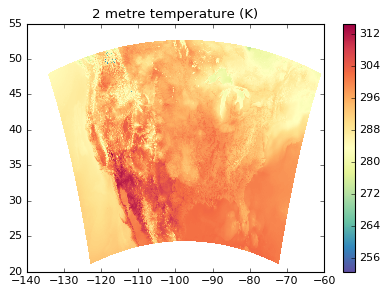

In [7]:
plt.pcolormesh(lons, lats, data, cmap='Spectral_r')
plt.colorbar()
plt.title('%s (%s)' % (G.name, G.units))

---
You can also retrieve one or more grib messages by searching for them.

In [8]:
grbs(name='2 metre temperature')

[54:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 1 hrs:from 201806080100]

In [9]:
grbs(shortName='t')

[12:Temperature:K (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 1 hrs:from 201806080100,
 17:Temperature:K (instant):lambert:isobaricInhPa:level 70000 Pa:fcst time 1 hrs:from 201806080100,
 22:Temperature:K (instant):lambert:isobaricInhPa:level 85000 Pa:fcst time 1 hrs:from 201806080100,
 26:Temperature:K (instant):lambert:isobaricInhPa:level 92500 Pa:fcst time 1 hrs:from 201806080100,
 30:Temperature:K (instant):lambert:isobaricInhPa:level 100000 Pa:fcst time 1 hrs:from 201806080100,
 47:Temperature:K (instant):lambert:surface:level 0:fcst time 1 hrs:from 201806080100]

In [10]:
grbs(shortName=['u', '10u'])

[9:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 25000 Pa:fcst time 1 hrs:from 201806080100,
 14:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 1 hrs:from 201806080100,
 19:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 70000 Pa:fcst time 1 hrs:from 201806080100,
 24:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 85000 Pa:fcst time 1 hrs:from 201806080100,
 28:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 92500 Pa:fcst time 1 hrs:from 201806080100,
 32:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 100000 Pa:fcst time 1 hrs:from 201806080100,
 43:U component of wind:m s**-1 (instant):lambert:heightAboveGround:level 80 m:fcst time 1 hrs:from 201806080100,
 59:10 metre U wind component:m s**-1 (instant):lambert:heightAboveGround:level 10 m:fcst time 1 hrs:from 201806080100]

In [11]:
grbs(shortName=['u', 'v'], level=80)

[43:U component of wind:m s**-1 (instant):lambert:heightAboveGround:level 80 m:fcst time 1 hrs:from 201806080100,
 44:V component of wind:m s**-1 (instant):lambert:heightAboveGround:level 80 m:fcst time 1 hrs:from 201806080100]

In [12]:
grbs(level=500)

[11:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 1 hrs:from 201806080100,
 12:Temperature:K (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 1 hrs:from 201806080100,
 13:Dew point temperature:K (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 1 hrs:from 201806080100,
 14:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 1 hrs:from 201806080100,
 15:V component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 50000 Pa:fcst time 1 hrs:from 201806080100,
 79:Surface lifted index:K (instant):lambert:isobaricLayer:levels 50000-100000 Pa:fcst time 1 hrs:from 201806080100]

In [13]:
grbs(name='Total Precipitation')

[64:Total Precipitation:kg m**-2 (accum):lambert:surface:level 0:fcst time 0-1 hrs (accum):from 201806080100]

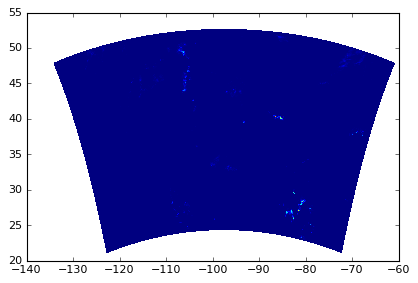

In [14]:
# Plot total precipitation
total_precip, lats, lons = grbs.select(name='Total Precipitation')[0].data()
plt.pcolormesh(lons, lats, total_precip)

---
## Smarter ways to download HRRR data from Pando
Instead of downloading the full GRIB2 file from Pando, only download what you need. For example, if you are only interested 2-m temperature, you can download just that field with `cURL`. To do this, you need to know the byte range of the variable, which is provided by the files `.idx` file. The `.idx` files are stored on Pando. For more information about how to do this, read the `cURL` and `Python` tabs here: http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/hrrr_script_tips.html